#OpenAI GTP-2
Copyright 2020, Denis Rothman MIT License. Denis Rothman created the Colab notebook using the OpenAI repository, adding title steps for educational purposes only.

IMPORTANT NOTE, Feb 2023 Update: GPT-2 has conversational chatbot functionality. This notebook was designed to illustrate text generation with GPT-2. However, Google Colab does not support Tensforflow 1x anymore.

There are two solutions:

1. Solution 1:  Running this notebook locally after installing Tensforflow 1. x on a local machine and setting up the directories as defined in the notebook.  

or (and)

2. Solution 2: Running a new 2023 notebook: GPT-2 & ChatGPT-the Origins.ipynb

This new notebook contains:

- a guide to understanding the source code of GPT-2 

- a Hugging Face implementation of text generation with GPT-2

- text generation with OpenAI davinci-instruct series(GPT-3)  which OpenAI ChatGPT was derived from. You will be able to run an example of a dialogue and compare the output  of the davinci-instruct-beta engine with the output of ChatGPT

- next steps to fine-tune your own chatbot 



---


It is important to note that we are running a low-level GPT-2 model 
and not a one-line call to obtain a result. We are also
avoiding pre-packaged versions. We are getting our hands dirty to
understand the architecture of a GPT-2 from scratch. You might get
some deprecation messages. However, the effort is worthwhile.

***Code Reference***
[Reference: OpenAI Repository](https://github.com/openai/gpt-2)

***Model Reference***
[Alec Radford, Jeffrey Wu, Rewon Child, David Luan, Dario Amodei, Ilya Sutskever,2019,'Language Models are Unsupervised Multitask Learners'](https://d4mucfpksywv.cloudfront.net/better-language-models/language-models.pdf)


Step 1: Pre-requisite: activate GPU in the notebook settings runTime menu



In [ ]:
from IPython.display import Image     #This is used for rendering images in the notebook

##Step 1: Activating the GPU

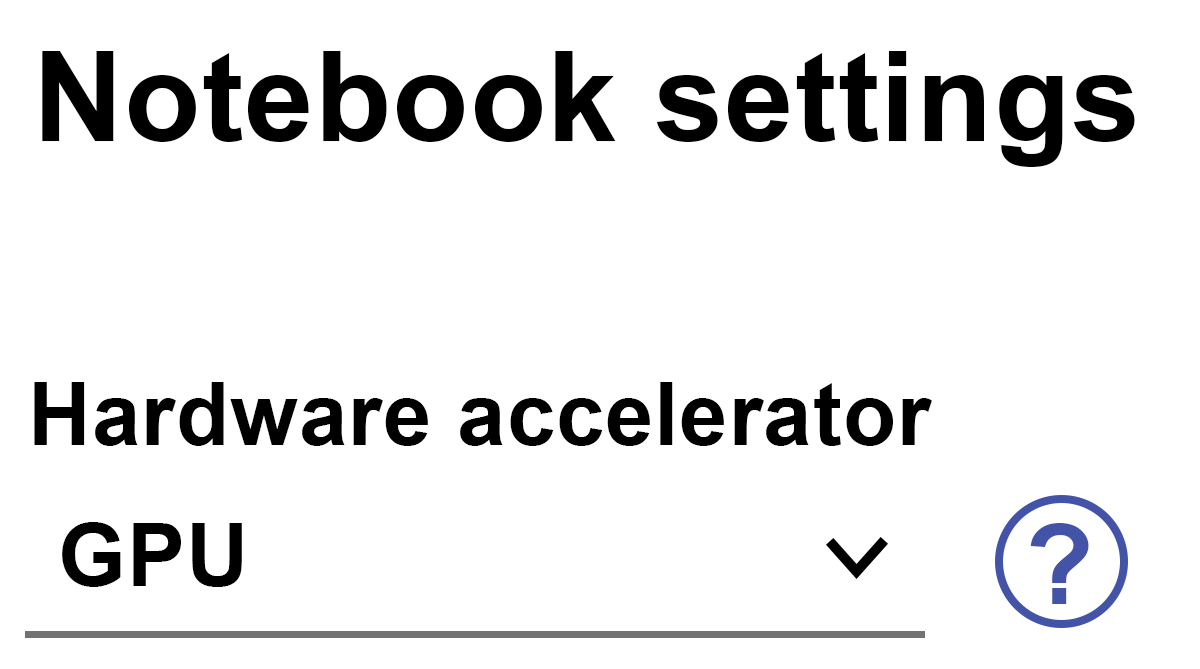

In [ ]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/AppIII/B17948_Appendix%20III_01.PNG', width=300) #This is used for rendering images in the notebook

#Step 2: Cloning the OpenAI GPT-2 repository

In [1]:
#@title Step 2: Cloning the OpenAI GPT-2 Repository 
#!git clone https://github.com/openai/gpt-2.git
!git clone https://github.com/nshepperd/gpt-2

Cloning into 'gpt-2'...
remote: Enumerating objects: 429, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 429 (delta 20), reused 77 (delta 11), pack-reused 291
Receiving objects: 100% (429/429), 4.47 MiB | 5.40 MiB/s, done.
Resolving deltas: 100% (216/216), done.


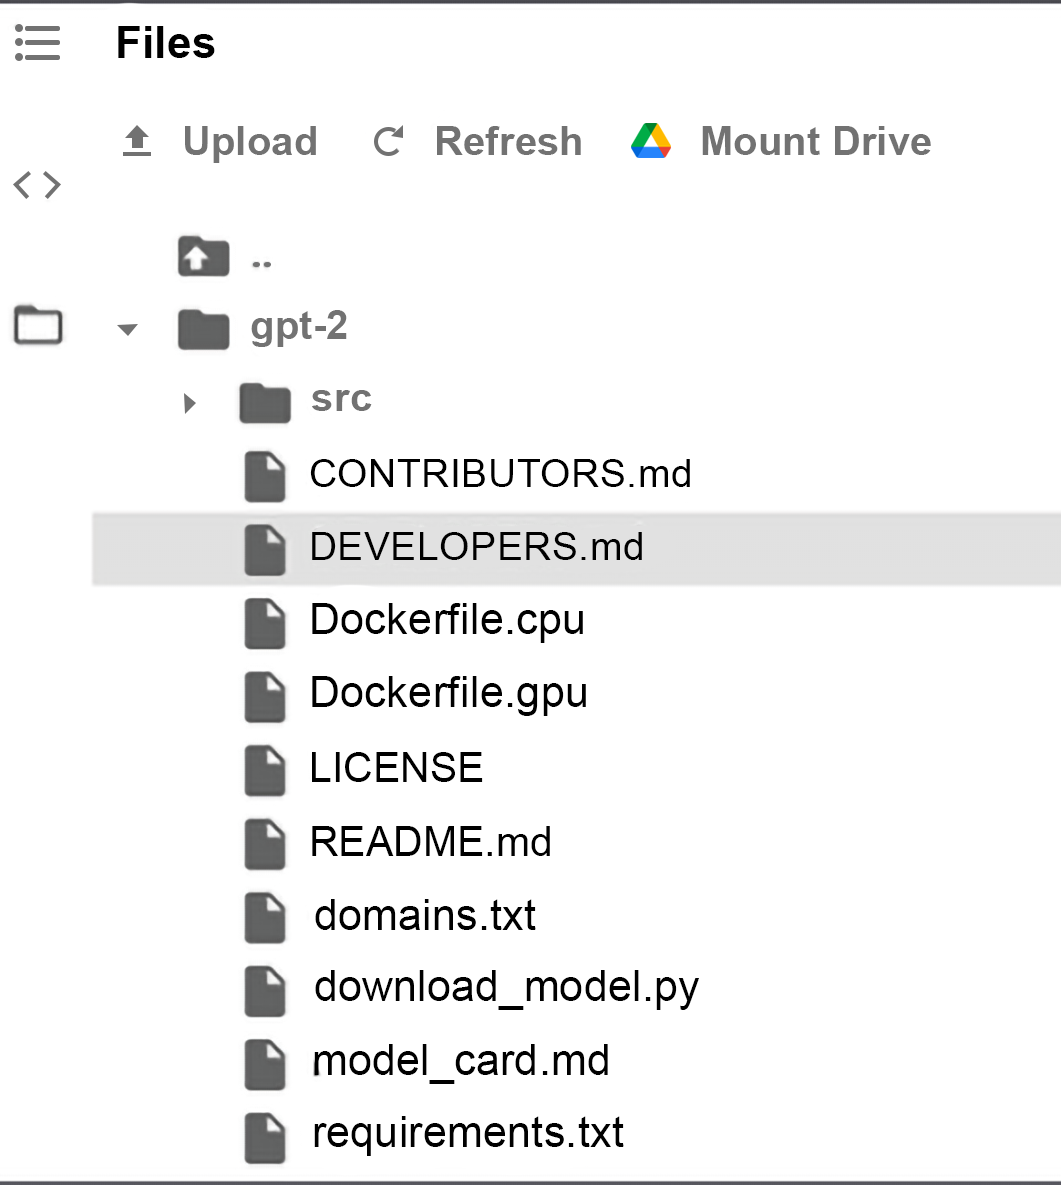

In [ ]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/AppIII/B17948_Appendix%20III_02.PNG', width=400) #This is used for rendering images in the notebook

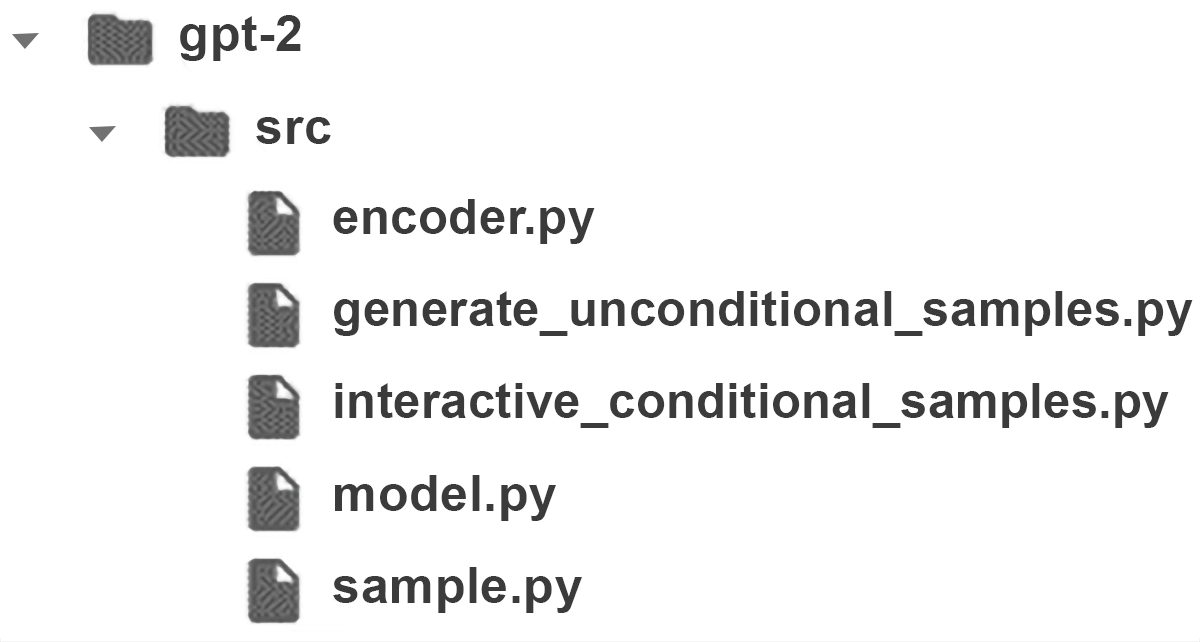

In [ ]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/AppIII/B17948_Appendix%20III_03.PNG', width=500) #This is used for rendering images in the notebook

#Step 3: Installing the requirements

In [2]:
#@title Step 3: Installing the requirements
import os                     # when the VM restarts import os necessary
os.chdir("/content/gpt-2")    
!pip3 install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.6/601.6 KB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 KB 7.0 MB/s eta 0:00:00
  Created wheel for regex: filename=regex-2017.4.5-cp39-cp39-linux_x86_64.whl size=677639 sha256=74519aca350fdb85c3e9ced2ddf7a25dd6cd1d3ceb8bcab3d25a3f5c9073488c
  Stored in directory: /root/.cache/pip/wheels/d4/70/3e/734b51125cb2502e07f14b79b8aa2f06ade3dc

#Step 4: Checking the version of TensorFlow

In [9]:
#@title Step 4 Checking the Version of TensorFlow 
#Colab has tf 2.x installed. 
import tensorflow as tf
print(tf.__version__)

2.11.0


#Step 5: Downloading the 345M-parameter GPT-2 model

In [4]:
#@title Step 5: Downloading the 345M parameter GPT-2 Model
# run code and send argument
import os # after runtime is restarted
os.chdir("/content/gpt-2")
!python3 download_model.py '345M' 

Fetching checkpoint: 1.00kit [00:00, 930kit/s]                                                      
Fetching encoder.json: 1.04Mit [00:00, 5.68Mit/s]                                                   
Fetching hparams.json: 1.00kit [00:00, 905kit/s]                                                    
Fetching model.ckpt.data-00000-of-00001: 1.42Git [01:10, 20.3Mit/s]                                 
Fetching model.ckpt.index: 11.0kit [00:00, 6.41Mit/s]                                               
Fetching model.ckpt.meta: 927kit [00:00, 5.01Mit/s]                                                 
Fetching vocab.bpe: 457kit [00:00, 2.95Mit/s]                                                       


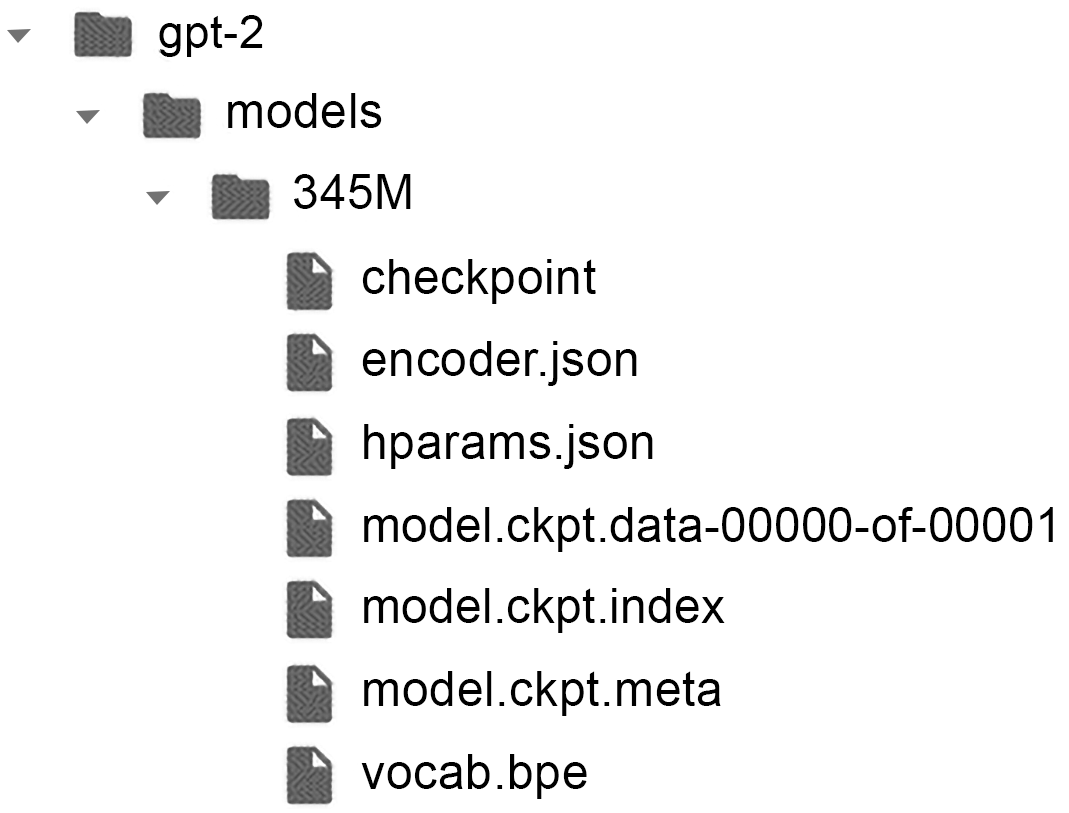

In [ ]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/AppIII/B17948_Appendix%20III_04.PNG', width=500) #This is used for rendering images in the notebook

#Steps 6 - 7: Intermediate instructions

In [5]:
#@title Step 6: Printing UTF encoded text to the console
!export PYTHONIOENCODING=UTF-8

In [6]:
#@title Step 7: Project Source Code
import os # import after runtime is restarted
os.chdir("/content/gpt-2/src")

In [14]:
#@title Step 7a: Interactive Conditional Samples (src)
#Project Source Code for Interactive Conditional Samples:
# /content/gpt-2/src/interactive_conditional_samples.py file 
# import tensorflow.compat.v1 for compatibility.
import json
import os
import numpy as np
import tensorflow.compat.v1 as tf

#Steps 7b - 8: Importing and defining the model

In [15]:
#@title Step 7b: Importing model sample encoder
import model, sample, encoder
#if following message:
#ModuleNotFoundError: No module named 'tensorflow.contrib'
#then go back and run Step 2 Checking TensorFlow version 

In [16]:
#@title Step 8: Defining the model
def interact_model(
    model_name,
    seed,
    nsamples,
    batch_size,
    length,
    temperature,
    top_k,
    models_dir
):
    models_dir = os.path.expanduser(os.path.expandvars(models_dir))
    if batch_size is None:
        batch_size = 1
    assert nsamples % batch_size == 0

    enc = encoder.get_encoder(model_name, models_dir)
    hparams = model.default_hparams()
    with open(os.path.join(models_dir, model_name, 'hparams.json')) as f:
        hparams.override_from_dict(json.load(f))

    if length is None:
        length = hparams.n_ctx // 2
    elif length > hparams.n_ctx:
        raise ValueError("Can't get samples longer than window size: %s" % hparams.n_ctx)

    with tf.Session(graph=tf.Graph()) as sess:
        context = tf.placeholder(tf.int32, [batch_size, None])
        np.random.seed(seed)
        tf.set_random_seed(seed)
        output = sample.sample_sequence(
            hparams=hparams, length=length,
            context=context,
            batch_size=batch_size,
            temperature=temperature, top_k=top_k
        )

        saver = tf.train.Saver()
        ckpt = tf.train.latest_checkpoint(os.path.join(models_dir, model_name))
        saver.restore(sess, ckpt)

        while True:
            raw_text = input("Model prompt >>> ")
            while not raw_text:
                print('Prompt should not be empty!')
                raw_text = input("Model prompt >>> ")
            context_tokens = enc.encode(raw_text)
            generated = 0
            for _ in range(nsamples // batch_size):
                out = sess.run(output, feed_dict={
                    context: [context_tokens for _ in range(batch_size)]
                })[:, len(context_tokens):]
                for i in range(batch_size):
                    generated += 1
                    text = enc.decode(out[i])
                    print("=" * 40 + " SAMPLE " + str(generated) + " " + "=" * 40)
                    print(text)
            print("=" * 80)

Step 9: Interacting with GPT-2

In [17]:
#@title Step 9: Interacting with GPT-2 
interact_model('345M',None,1,1,300,1,0,'/content/gpt-2/models')

Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use `tf.random.categorical` instead.


Model prompt >>> Human reason, in one sphere of its cognition, is called upon to consider questions, which it cannot decline, as they are presented by its own nature, but which it cannot answer, as they transcend every faculty of the mind.
======================================== SAMPLE 1 ========================================
 Every truth released from matter, and presented to the recognition of its own nature; or, more correct and clearer, explained in the understanding, as delineated in its knowledge of itself: science by its power alone, delivers from the imago moralis irrational of its intelligence will to teach an acceptable doctrine in man's mind; not only fix and reality impose on it, but repress, nutrition and Amendment Ham� embodies a trend towards the distribution of learning : the devices I trust the progress toward can, and test our vision in Divine Knowledge. Learning takes place in all parts of us; self learned being the first to go to Babylon ; but, on the other hand,

KeyboardInterrupt: ignored